<a href="https://colab.research.google.com/github/sadamhabnawi28/Exoplanet/blob/main/Exoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from keras import models, layers, optimizers
from keras.models import Sequential

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
path = '/content/drive/MyDrive/Astronomy data/Exoplanet_data/'

In [ ]:
df_con=pd.read_csv(path+'exoplanet_confirmed.csv')
df_can=pd.read_csv(path+'exoplanet_candidate.csv')
df_oth=pd.read_csv(path+'exoplanet_other.csv')

In [ ]:
df0= pd.concat([df_con,df_can], ignore_index=True)
df = pd.concat([df0,df_oth],ignore_index=True)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Astronomy data/Exoplanet_data/NASA_exoplanet.csv')

#Data Preprocessing and EDA

##Exoplanet.eu

In [ ]:
df.head()

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,6.8370,0.53200,0.53200,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.0,80.0,NaN,NaN,HD 10697
1,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.10,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN


In [ ]:
df.shape

(8544, 98)

###Droping Columns

In [ ]:
#Drop unnecessary columns
df = df.drop(columns=['dec','ra',
                      'name',
                      'star_sp_type',
                      'mag_i',
                      'mass_sini',
                      'alternate_names',
                      'mass_error_min',
                      'mass_error_max',
                      'mass_sini_error_min',
                      'mass_sini_error_max',
                      'radius_error_min',
                      'radius_error_max',
                      'orbital_period_error_min',
                      'orbital_period_error_max',
                      'semi_major_axis_error_min',
                      'semi_major_axis_error_max',
                      'eccentricity_error_min',
                      'eccentricity_error_max',
                      'inclination_error_min',
                      'inclination_error_max',
                      'molecules','discovered',
                      'tzero_tr_sec',
                      'tzero_tr_sec_error_min',
                      'tzero_tr_sec_error_max',
                      'lambda_angle',
                      'lambda_angle_error_min',
                      'lambda_angle_error_max',
                      'tzero_vr',
                      'tzero_vr_error_max',
                      'tzero_vr_error_min',
                      'temp_measured',
                      'hot_point_lon',
                      'geometric_albedo',
                      'geometric_albedo_error_min',
                      'geometric_albedo_error_max',
                      'log_g',
                      'star_magnetic_field',
                      'star_name',
                    'inclination',
                    'tzero_tr',
                    'mag_v',
                    'mag_k',
                    'mag_h',
                    'mag_j',
                    'omega',
                    'k',
                    'star_alternate_names',
                    'updated',
                    'angular_distance',
                    'omega_error_min',
                    'omega_error_max',
                    'tperi_error_min',
                    'tperi_error_max',
                    'tperi',
                    'tconj_error_min',
                    'tconj_error_max',
                    'tconj',
                    'tzero_tr_error_min',
                    'tzero_tr_error_max',
                    'impact_parameter_error_min',
                    'impact_parameter_error_max',
                    'k_error_min',
                    'k_error_max',
                    'temp_calculated_error_min',
                    'temp_calculated_error_max',
                    'star_distance_error_min',
                    'star_distance_error_max',
                    'star_metallicity_error_min',
                    'star_metallicity_error_max',
                    'star_mass_error_min',
                    'star_mass_error_max',
                    'star_radius_error_min',
                    'star_radius_error_max',
                    'star_age_error_min',
                    'star_age_error_max',
                    'star_teff_error_min',
                    'star_teff_error_max',
                    'star_detected_disc'])

###Rename Some Columns

In [ ]:
#Rename columns to write down the units
df=df.rename(columns={'mass':'mass_Mjup',
                      'radius':'radius_Rjup',
                      'orbital_period':'orbital_period_days',
                      'semi_major_axis':'semi_major_axis_au',
                      'temp_calculated':'tempK_calculated',
                      'star_distance':'star_distance_pc',
                      'star_mass':'star_mass_Msun',
                      'star_radius':'star_radius_Rsun',
                      'star_age':'star_age_Gy',
                      'star_teff':'star_teffK'})

###EDA Continued

In [ ]:
df = df[df.radius_Rjup > 0]

In [ ]:
df.radius_detection_type = df.radius_detection_type.fillna('Other')

In [ ]:
df.radius_detection_type.value_counts()

radius_detection_type
Other              4880
Primary Transit    1416
Theoretical          81
Flux                 48
Name: count, dtype: int64

In [ ]:
df.mass_detection_type=df.mass_detection_type.fillna('Other')

In [ ]:
df.mass_detection_type.value_counts()

mass_detection_type
Other              5190
Radial Velocity     885
Theoretical         176
Spectrum            102
TTV                  59
Timing                8
Astrometry            5
Name: count, dtype: int64

In [ ]:
print(df.publication.unique())
print(df.detection_type.unique())
print(df.mass_detection_type.unique())
print(df.radius_detection_type.unique())

['Published in a refereed paper' 'Submitted to a professional journal'
 'Announced on a professional conference' 'Announced on a website']
['Radial Velocity' 'Imaging' 'Primary Transit' 'Timing, Kinematic' 'Other'
 'Timing' 'Microlensing' 'TTV' 'Radial Velocity, Primary Transit'
 'Primary Transit, Radial Velocity' 'Other, Imaging, Kinematic']
['Radial Velocity' 'Other' 'Spectrum' 'Theoretical' 'Timing' 'TTV'
 'Astrometry']
['Theoretical' 'Other' 'Primary Transit' 'Flux']


In [ ]:
df.eccentricity = df.eccentricity.fillna(0).astype(float)

In [ ]:
if df.planet_status[df.planet_status=='Controversial'].all() == True:
    df.planet_status[df.planet_status=='Controversial']=0.05
if df.planet_status[df.planet_status=='Retracted'].all()==True:
    df.planet_status[df.planet_status=='Retracted']=0.05
if df.planet_status[df.planet_status=='Confirmed'].all()==True:
    df.planet_status[df.planet_status=='Confirmed']= 0.95
if df.planet_status[df.planet_status=='Candidate'].all()==True:
    df.planet_status[df.planet_status=='Candidate']= 0.5

<ipython-input-112-60180088586f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.planet_status[df.planet_status=='Controversial']=0.05
<ipython-input-112-60180088586f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.planet_status[df.planet_status=='Retracted']=0.05
<ipython-input-112-60180088586f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.planet_status[df.planet_status=='Confirmed']= 0.95
<ipython-input-112-6018008858

In [ ]:
df = df.rename(columns={'planet_status':'prob'})

In [ ]:
df.prob = df.prob.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6425 entries, 0 to 8540
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prob                   6425 non-null   float64
 1   mass_Mjup              1642 non-null   float64
 2   radius_Rjup            6425 non-null   float64
 3   orbital_period_days    6335 non-null   float64
 4   semi_major_axis_au     4711 non-null   float64
 5   eccentricity           6425 non-null   float64
 6   impact_parameter       4203 non-null   float64
 7   tempK_calculated       3465 non-null   float64
 8   publication            6425 non-null   object 
 9   detection_type         6425 non-null   object 
 10  mass_detection_type    6425 non-null   object 
 11  radius_detection_type  6425 non-null   object 
 12  star_distance_pc       4002 non-null   float64
 13  star_metallicity       5802 non-null   float64
 14  star_mass_Msun         5971 non-null   float64
 15  star_radi

In [ ]:
df.describe()

,prob,mass_Mjup,radius_Rjup,orbital_period_days,semi_major_axis_au,eccentricity,impact_parameter,tempK_calculated,star_distance_pc,star_metallicity,star_mass_Msun,star_radius_Rsun,star_age_Gy,star_teffK
count,6425.000000,1642.000000,6.425000e+03,6.335000e+03,4711.000000,6425.000000,4203.000000,3465.000000,4002.000000,5802.000000,5971.000000,6219.000000,2342.000000,6186.000000
mean,0.784638,3.565042,5.272742e+00,1.585222e+03,6.005460,0.023337,0.981077,940.894263,608.266637,0.876926,0.961020,1.171417,4.206481,5576.750498
std,0.222563,11.666052,8.665801e+01,1.015576e+05,127.164748,0.096122,5.989382,628.497618,710.972078,72.351860,0.285275,2.336925,2.392698,2680.772642
min,0.050000,0.000006,6.200000e-12,1.250000e-02,0.001187,0.000000,-0.629000,25.000000,1.998000,-2.020000,0.015400,0.000020,0.001000,575.000000
25%,0.500000,0.027377,1.330000e-01,3.992096e+00,0.048000,0.000000,0.180000,530.000000,203.841000,-0.191000,0.813000,0.790000,2.820000,5153.250000
50%,0.950000,0.377500,2.130000e-01,9.658690e+00,0.085100,0.000000,0.390000,806.000000,492.000000,-0.040000,0.960000,0.952000,4.070000,5667.000000
75%,0.950000,1.460750,6.210000e-01,2.724347e+01,0.182050,0.000000,0.695300,1209.000000,859.732500,0.060000,1.084000,1.200000,4.900000,6038.000000
max,0.950000,264.000000,4.332120e+03,8.035500e+06,6471.000000,3.155000,98.041400,14225.000000,15130.000000,5511.000000,3.366000,149.058000,15.000000,200000.000000


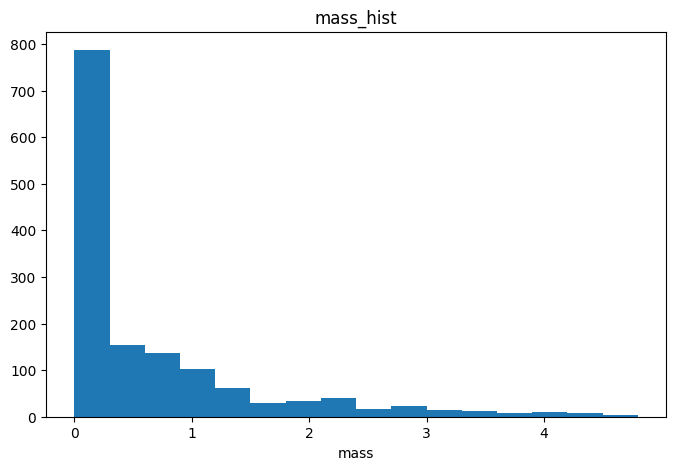

In [ ]:
bins=np.arange(0,5,0.3)
ticks=np.arange(0,5,1)
fig=plt.figure(figsize=(8,5))
plt.hist(df.mass_Mjup, bins=bins)
plt.xticks(ticks)
plt.title('mass_hist')
plt.xlabel('mass')
plt.show()

In [ ]:
print('mean : ', df.mass_Mjup.mean())
print('stdev : ', df.mass_Mjup.std())
print('skewness : ',df.mass_Mjup.skew())

mean :  3.565041759165049
stdev :  11.666052170084086
skewness :  9.24034764417516


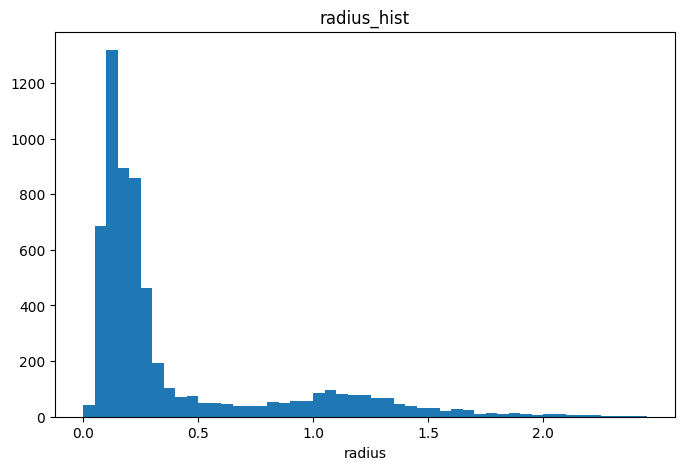

In [ ]:
bins=np.arange(0,2.5,0.05)
ticks=np.arange(0,2.5,0.5)
fig=plt.figure(figsize=(8,5))
plt.hist(df.radius_Rjup, bins=bins)
plt.xticks(ticks)
plt.title('radius_hist')
plt.xlabel('radius')
plt.show()

In [ ]:
print('mean : ', df.radius_Rjup.mean())
print('stdev : ', df.radius_Rjup.std() )
print('skewness : ', df.radius_Rjup.skew())

mean :  5.272741826681618
stdev :  86.6580135126384
skewness :  31.329521984811095


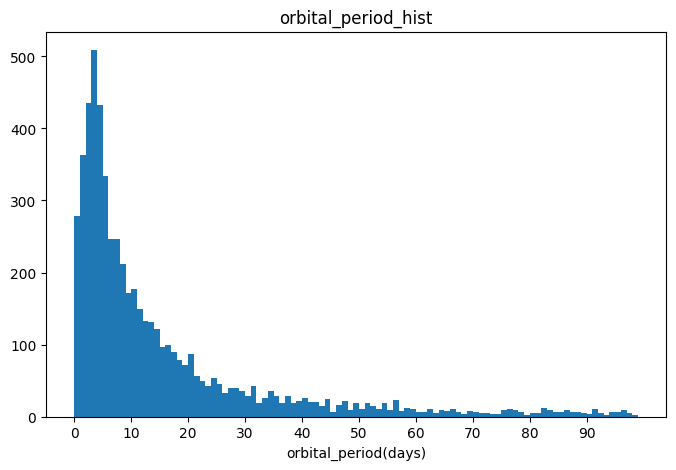

In [ ]:
bins=np.arange(0,100,1)
ticks=np.arange(0,100,10)
fig=plt.figure(figsize=(8,5))
plt.hist(df.orbital_period_days, bins=bins)
plt.xticks(ticks)
plt.title('orbital_period_hist')
plt.xlabel('orbital_period(days)')
plt.show()

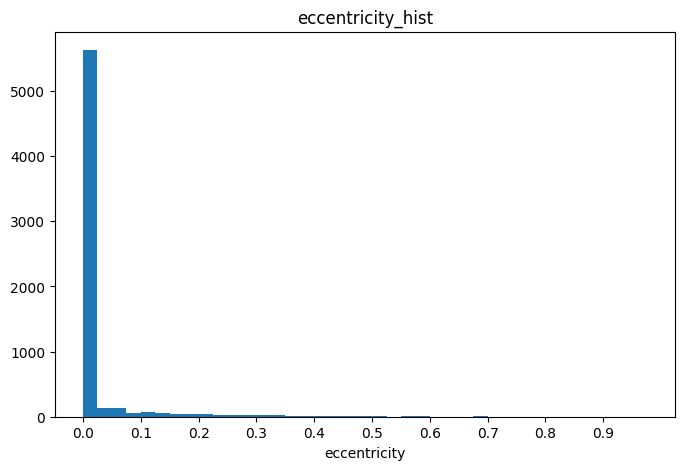

In [ ]:
bins=np.arange(0,1,0.025)
ticks=np.arange(0,1,0.1)
fig=plt.figure(figsize=(8,5))
plt.hist(df.eccentricity, bins=bins)
plt.xticks(ticks)
plt.title('eccentricity_hist')
plt.xlabel('eccentricity')
plt.show()

In [ ]:
print('mean : ', df.eccentricity.mean())
print('stdev : ', df.eccentricity.std() )
print('skewness : ', df.eccentricity.skew())

mean :  0.02333740233463035
stdev :  0.09612183514243572
skewness :  11.12450508996754


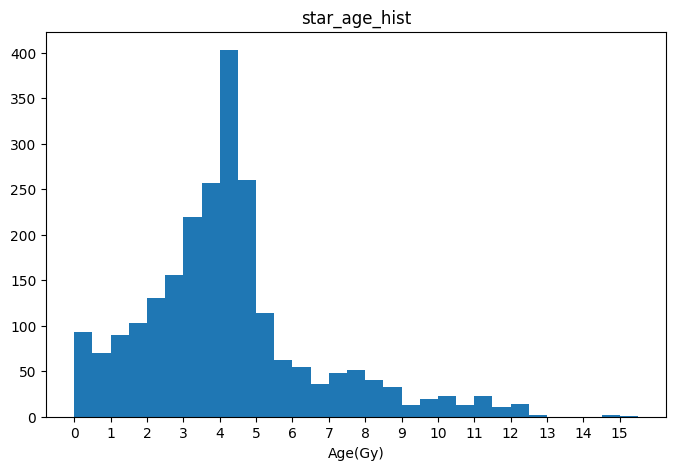

In [ ]:
bins=np.arange(0,16,0.5)
ticks=np.arange(0,16,1)
fig=plt.figure(figsize=(8,5))
plt.hist(df.star_age_Gy, bins=bins)
plt.xticks(ticks)
plt.title('star_age_hist')
plt.xlabel('Age(Gy)')
plt.show()

In [ ]:
print('mean : ', df.star_age_Gy.mean())
print('stdev : ', df.star_age_Gy.std() )
print('skewness : ', df.star_age_Gy.skew())

mean :  4.206481468830059
stdev :  2.3926979385441696
skewness :  1.0169347355759721


# Train-Test Split

In [ ]:
df1 = df.iloc[:,12:18].drop('star_age_Gy',axis=1)
df1['prob']= df.prob

In [ ]:
df1 =df1.dropna()

In [ ]:
X = df1.drop('prob',axis=1)
Y = df1.prob

In [ ]:
#Scaling

StdSc = StandardScaler()
X = StdSc.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42,test_size= 0.25)
print('X_train size : ', X_train.size)
print('X_test size : ', X_test.size)
print('Y_train size : ', Y_train.size)
print('Y_test size : ', Y_test.size)

X_train size :  12285
X_test size :  4095
Y_train size :  2457
Y_test size :  819


#Modelling

##Linear Regression

r2: -1107.7261313130746
MAE: 0.1317733378751178
RMSE: 3.110640174952921


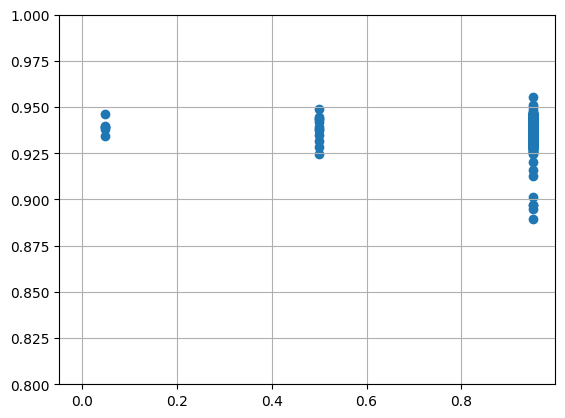

In [ ]:
#model training
modelLR = LinearRegression()
modelLR.fit(X_train, Y_train)

#model evaluation
Y_predLR = modelLR.predict(X_test).flatten()

print('r2:', r2_score(Y_test,Y_predLR))
print('MAE:', mean_absolute_error(Y_test,Y_predLR))
print('RMSE:', (mean_squared_error(Y_test,Y_predLR)**0.5))

plt.scatter(Y_test, Y_predLR)
plt.plot(np.arange(0,1), np.arange(0, 1), color = 'green')
plt.ylim((0.8,1))
plt.grid(True)

##Decision Tree

r2: -0.640065033900646
MAE: 0.021978021978024138
RMSE: 0.11963773156152188


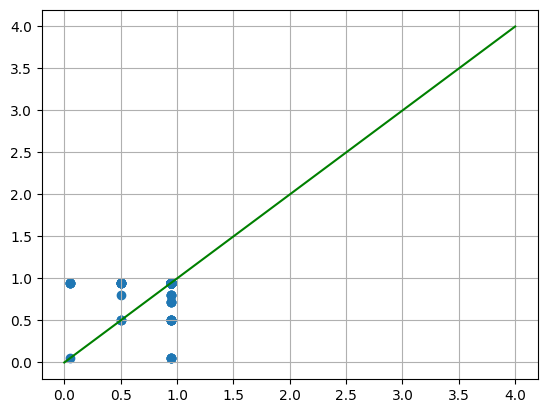

In [ ]:
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, Y_train)
Y_predDTR = modelDTR.predict(X_test).flatten()

#model evaluation
Y_predDTR = modelDTR.predict(X_test).flatten()

print('r2:', r2_score(Y_test,Y_predDTR))
print('MAE:', mean_absolute_error(Y_test,Y_predDTR))
print('RMSE:', (mean_squared_error(Y_test,Y_predDTR)**0.5))

plt.scatter(Y_test, Y_predDTR)
plt.plot(np.arange(0,5), np.arange(0, 5), color = 'green')
plt.grid(True)

##Random Forest

r2: -0.11727376585960592
MAE: 0.022757034632035024
RMSE: 0.09874552786265561


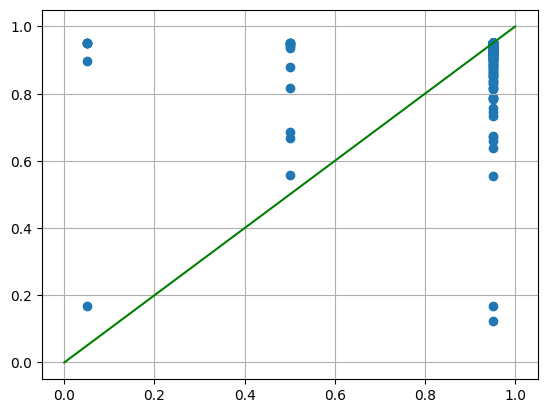

In [ ]:
modelRFR = RandomForestRegressor(n_estimators=100, random_state=42)
modelRFR.fit(X_train, Y_train)

#model evaluation
Y_predRFR = modelRFR.predict(X_test).flatten()

print('r2:', r2_score(Y_test,Y_predRFR))
print('MAE:', mean_absolute_error(Y_test,Y_predRFR))
print('RMSE:', (mean_squared_error(Y_test,Y_predRFR)**0.5))

plt.scatter(Y_test, Y_predRFR)
plt.plot(np.arange(0,2), np.arange(0, 2), color = 'green')
#plt.ylim((0.8,1))
plt.grid(True)

##ANN

In [ ]:
#building ANN architecture

network = models.Sequential()
network.add(layers.Dense(40, activation='relu', input_shape=(5,)))
network.add(layers.Dense(45, activation='leaky_relu'))
network.add(layers.Dense(45, activation ='relu'))
network.add(layers.Dense(40, activation= 'leaky_relu'))
network.add(layers.Dense(35, activation= 'relu'))
network.add(layers.Dense(30, activation= 'leaky_relu'))
network.add(layers.Dense(20, activation= 'sigmoid'))
network.add(layers.Dense(1))

# compile
network.compile(loss='mse', optimizer=optimizers.AdamW(), metrics=['mae'])

In [ ]:
history = network.fit(X_train, Y_train, epochs=300, batch_size=200,  verbose=1, validation_split=0.2)

Epoch 1/300
10/10 [==============================] - 1s 21ms/step - loss: 1.1339 - mae: 1.0592 - val_loss: 0.8597 - val_mae: 0.9229
Epoch 2/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5941 - mae: 0.7463 - val_loss: 0.2822 - val_mae: 0.4920
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1700 - mae: 0.3522 - val_loss: 0.1470 - val_mae: 0.2981
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1266 - mae: 0.2685 - val_loss: 0.0823 - val_mae: 0.2279
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0679 - mae: 0.2114 - val_loss: 0.0570 - val_mae: 0.2041
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0477 - mae: 0.1789 - val_loss: 0.0325 - val_mae: 0.1455
Epoch 7/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0309 - mae: 0.1297 - val_loss: 0.0211 - val_mae: 0.1109
Epoch 8/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0219 - 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


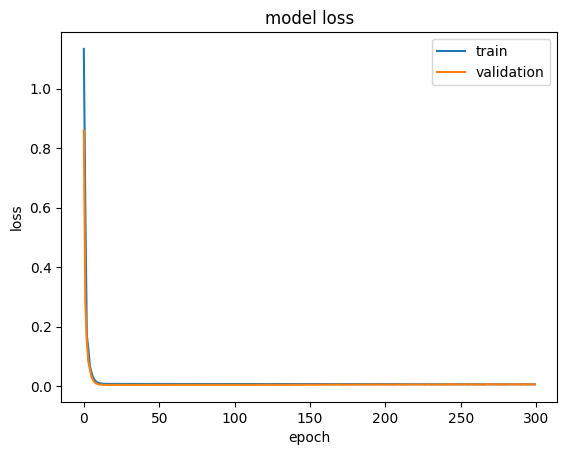

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

26/26 [==============================] - 0s 1ms/step
r2: -0.06994210602165851
MAE: 0.02609005472162266
RMSE: 0.09663128937608852


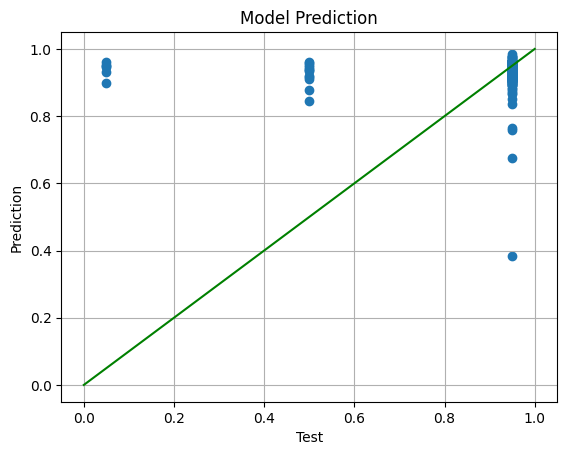

In [ ]:
# model evaluation
Y_predANN=network.predict(X_test)
print('r2:', r2_score(Y_test,Y_predANN))
print('MAE:', mean_absolute_error(Y_test,Y_predANN))
print('RMSE:', (mean_squared_error(Y_test,Y_predANN)**0.5))


plt.scatter(Y_test,Y_predANN)
plt.title("Model Prediction")
plt.xlabel("Test")
plt.ylabel("Prediction")
plt.plot(np.arange(0,2), np.arange(0, 2), color = 'green')
plt.grid(True)
plt.show()